### Fake Comments Classifier

In [3]:
# Import required l libraries
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("F:/ZS/Data Sets/train.csv")

### Exploring the dataset

In [5]:
df.shape

(1157, 5)

In [6]:
df.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

In [7]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


### Visualization

In [8]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1    586
0    571
Name: CLASS, dtype: int64

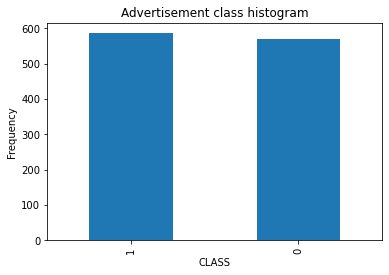

In [9]:
pd.value_counts(df['CLASS']).plot.bar()
plt.title('Advertisement class histogram')
plt.xlabel('CLASS')
plt.ylabel('Frequency')
df['CLASS'].value_counts()

### Data Cleaning and Preprocessing

In [10]:
print(df.shape)

(1157, 5)


In [11]:
# Finding any NaN values
df.isna().any()

COMMENT_ID    False
AUTHOR        False
DATE           True
CONTENT       False
CLASS         False
dtype: bool

In [12]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(1019, 5)


In [13]:
comments = df.copy()

In [14]:
comments.reset_index(inplace=True)

### Natural Language Processing

In [15]:
# Importing essential libraries for performing Natural Language Processing on 'kaggle_fake_train' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Anoop
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Cleaning the comments
corpus = []
ps = PorterStemmer()

for i in range(0,comments.shape[0]):

  # Cleaning special character from the comments-CONTENT
  CONTENT = re.sub(pattern='[^a-zA-Z]', repl=' ', string=comments.CONTENT[i])

  # Converting the entire comments-CONTENT to lower case
  CONTENT = CONTENT.lower()

  # Tokenizing the comments-CONTENT by words
  words = CONTENT.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  CONTENT = ' '.join(words)

  # Building a corpus of comments-CONTENT
  corpus.append(CONTENT)

In [17]:
corpus[0:10]

['huh anyway check tube channel kobyoshi',
 'shake sexi ass channel enjoy',
 'watch v vtarggvgtwq check',
 'subscrib channel',
 'u check channel tell next',
 'start read stop subscrib within one day entir famili die want stay aliv subscrib right',
 'http twitter com gbphotographygb',
 'pleas like http premium easypromosapp com votem',
 'hello like game art video scientif experi tutori lyric video much much pleas check channel subscrib start soon hope abl cover expect also check got far',
 'check view']

In [18]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [19]:
X.shape

(1019, 5000)

In [20]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
# Extracting dependent variable from the dataset
y = comments['CONTENT']

### Model Building

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Multinomial Naive Bayes

In [24]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [28]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
# score2 = precision_score(y_test, nb_y_pred)
# score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
# print("Precision score is: {}".format(round(score2,2)))
# print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 6.86%


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [30]:
nb_cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

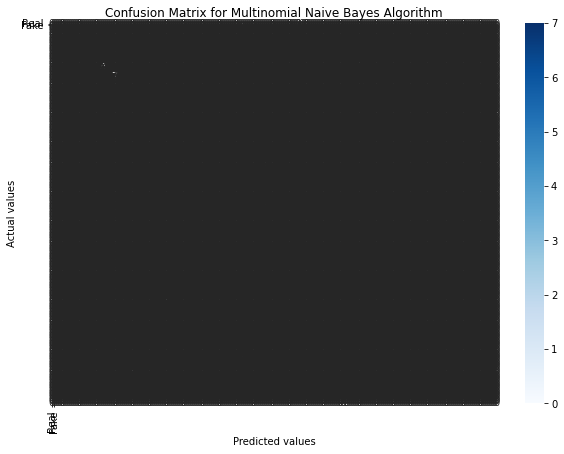

In [31]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [32]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 7.84%
Accuracy score for alpha=0.2 is: 7.84%
Accuracy score for alpha=0.3 is: 7.84%
Accuracy score for alpha=0.4 is: 7.35%
Accuracy score for alpha=0.5 is: 6.86%
Accuracy score for alpha=0.6 is: 6.86%
Accuracy score for alpha=0.7 is: 6.86%
Accuracy score for alpha=0.8 is: 6.86%
Accuracy score for alpha=0.9 is: 6.86%
Accuracy score for alpha=1.0 is: 6.86%
--------------------------------------------
The best accuracy is 7.84% with alpha value as 0.1


### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [34]:
# Predicting the Test set results
lr_y_pred = lr_classifier.predict(X_test)

In [36]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
#score2 = precision_score(y_test, lr_y_pred)
#score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
#print("Precision score is: {}".format(round(score2,2)))
#print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 7.84%


In [74]:
classifier = LogisticRegression(C=0.8, random_state=0)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.8, random_state=0)

## Predictions

In [75]:
def fake_comments(sample_comments):
  sample_comments = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_comments)  
  sample_comments = sample_comments.lower() 
  sample_comments_words = sample_comments.split()
  sample_comments_words = [word for word in sample_comments_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_comments = [ps.stem(word) for word in sample_comments_words]
  final_comments = ' '.join(final_comments)

  temp = cv.transform([final_comments]).toarray()
  return classifier.predict(temp)


In [38]:
# Importing test dataset
df_test = pd.read_csv('F:/ZS/Data Sets/test.csv')

In [39]:
df_test.columns

Index(['ID', 'COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT'], dtype='object')

In [40]:
adv_CONTENT = df_test['CONTENT']
adv_CONTENT.shape

(799,)

In [42]:
# For generating random integer
from random import randint

In [77]:
# Predicting values
row = randint(0,adv_CONTENT.shape[0]-1)
sample_news = adv_CONTENT[row]

if fake_comments(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

Prediction: This is a FAKE news!


In [83]:
prediction=[]
for i in range(0, len(adv_CONTENT)):
    row = randint(0,adv_CONTENT.shape[0]-1)
    sample_contents = adv_CONTENT[row]
    if fake_comments(sample_contents):
        prediction.append(1)
    else:
        prediction.append(0)
    

In [90]:
len(prediction)

799

In [92]:
prediction.count(0)

0